In [3]:
from keras.layers import Dense, Input, Flatten, Rescaling, Conv2D, BatchNormalization, Dropout, MaxPool2D, Activation, MaxPooling2D
from keras.models import Sequential
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
import tensorflow as tf
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('./digit_char_dataset.csv')
df.drop(df.tail(1).index,inplace=True)

In [5]:
X_df = df.drop('class',axis = 1)
X = np.array(X_df)
Y = np.array(df['class'])

In [6]:
train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
classes = []

for i in range(36):

    if i < 10:
        classes.append(chr(i+48))
    else:
        classes.append(chr(i-10+65))

In [8]:
X_train_reshaped = train_set_x.reshape(-1, 28, 28, 1)
X_test_reshaped = test_set_x.reshape(-1, 28, 28, 1)

In [9]:
Y_train_encoded = tf.keras.utils.to_categorical(train_set_y, num_classes=36)
Y_test_encoded = tf.keras.utils.to_categorical(test_set_y, num_classes=36)

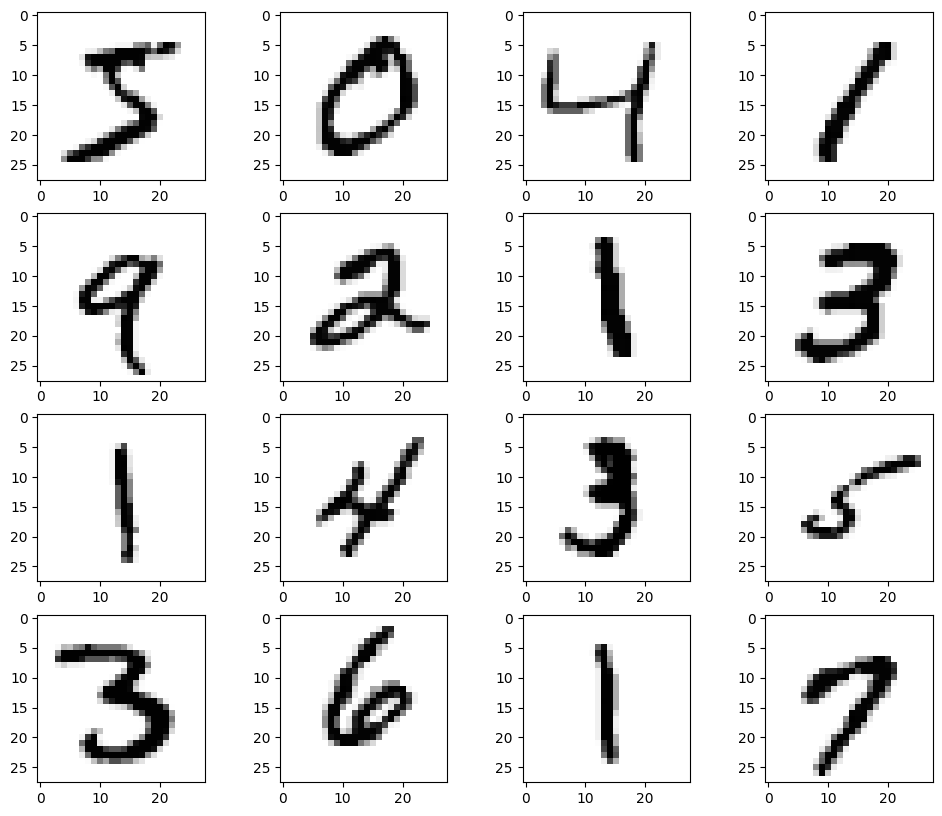

In [10]:
from sklearn.utils import shuffle

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):
  plt.subplot(colums, row, i+1)
  plt.imshow(X_df.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [11]:
cnn = Sequential([
  Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

  Conv2D(64, kernel_size=(3, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

  Flatten(),

  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(36, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           2,340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431,332 (1.65 MB)

 Trainable params: 431,140 (1.64 MB)

 Non-trainable params: 192 (768.00 B)

In [14]:
cnn_fit=cnn.fit(X_train_reshaped, Y_train_encoded, epochs=5, validation_data=(X_test_reshaped,Y_test_encoded))

Epoch 1/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.4622 - loss: 2.0149 - val_accuracy: 0.8241 - val_loss: 0.6725
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8961 - loss: 0.3568 - val_accuracy: 0.9213 - val_loss: 0.2671
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9532 - loss: 0.1894 - val_accuracy: 0.9429 - val_loss: 0.1922
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9638 - loss: 0.1109 - val_accuracy: 0.9352 - val_loss: 0.2206
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9904 - loss: 0.0456 - val_accuracy: 0.9414 - val_loss: 0.2029


In [15]:
history = cnn_fit.history

training_loss = history['loss']
validation_loss = history['val_loss']

training_accuracy = history['accuracy']
validation_accuracy = history['val_accuracy']


print("Training Loss:", training_loss)
print("Validation Loss:", validation_loss)
print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)

Training Loss: [1.162730097770691, 0.30534663796424866, 0.16143040359020233, 0.11267627775669098, 0.049646828323602676]
Validation Loss: [0.672457218170166, 0.267050176858902, 0.1921626776456833, 0.22058705985546112, 0.20294590294361115]
Training Accuracy: [0.6790205240249634, 0.9080079197883606, 0.9569821357727051, 0.9649239182472229, 0.9874255657196045]
Validation Accuracy: [0.8240740895271301, 0.9212962985038757, 0.9429012537002563, 0.9351851940155029, 0.9413580298423767]


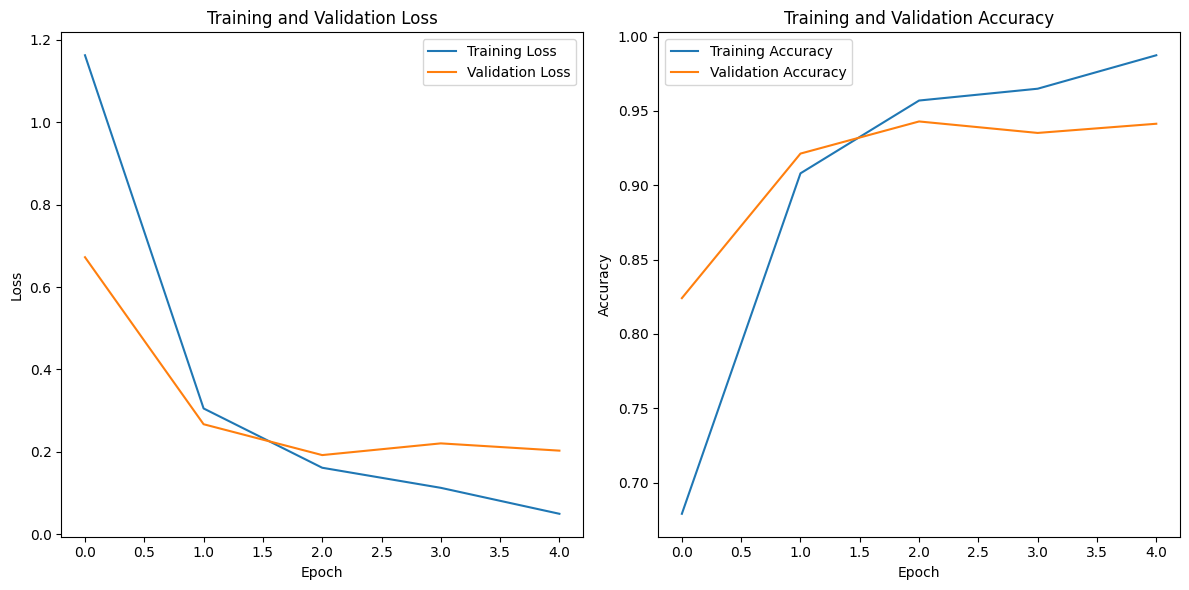

In [16]:
# Plotting the Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()